<a href="https://colab.research.google.com/github/jfelic/software-dev-salaries-based-on-location/blob/main/feliciano_data_101_midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA Science 101**

Midterm Project

By Julian Feliciano

Feb 27, 2024

About this Data Set: This dataset provides a look into the salaries of software developers in major cities located in the United States. It also explores the home prices/average cost of living in these areas.

## **1. Research Question**
Which metropolitan areas in the United States offer the best compensation for software developers, considering both the mean adjusted salary and the cost of living? How does the number of software developer jobs in each area contribute to the overall assessment?
*   Why: I would like to know where in the
United States offers the best compensation for software developers in order to make an educated decision when applying for software developer positions in the near future.


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## **2. Data Acquisition**
Data was downloaded as a .csv from kaggle.
* Link: https://www.kaggle.com/datasets/thedevastator/u-s-software-developer-salaries

In [ ]:
## Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the data set and set it equal to 'myData' variable
myData = pd.read_csv('/content/SofwareDeveloperIncomeExpensesperUSACity.csv')

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## **3. Data cleaning/preparation**

- before cleaning our data, we need to get a general idea of what's going on in our dataset. To do that, I will be doing some data exploration before the cleaning (i.e., head(), shape, info(), etc.)

In [ ]:
# Lets take a quick glance at our data set before continuing:
myData.head()

,Unnamed: 0,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,0,"Columbus, OH",117552.0,108500.0,51260.0,13430.0,192000.0,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,1,"Seattle-Tacoma-Bellevue, WA",117323.0,131167.0,65400.0,65760.0,491600.0,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,2,"Charlotte-Concord-Gastonia, NC-SC",114122.0,107046.0,51000.0,12800.0,208500.0,"Charlotte, NC",989.9,1974.5,3221.1,8939.8
3,3,"Colorado Springs, CO",112118.0,111670.0,51430.0,5780.0,296500.0,"Colorado Springs, CO",1049.2,1594.0,3094.5,8493.1
4,4,"Dayton, OH",111616.0,99338.0,50100.0,4240.0,124100.0,"Dayton, OH",961.2,1072.1,2586.0,4887.7


In [ ]:
# Now lets take a look at the shape to get a sense of how big this dataset is:
myData.shape

(77, 12)

In [ ]:
# I want to see how many null values there are and if it's worth dropping them:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   77 non-null     int64  
 1   Metro                                        77 non-null     object 
 2   Mean Software Developer Salary (adjusted)    77 non-null     float64
 3   Mean Software Developer Salary (unadjusted)  77 non-null     float64
 4   Mean Unadjusted Salary (all occupations)     77 non-null     float64
 5   Number of Software Developer Jobs            77 non-null     float64
 6   Median Home Price                            77 non-null     float64
 7   City                                         77 non-null     object 
 8   Cost of Living avg                           77 non-null     float64
 9   Rent avg                                     77 non-null     float64
 10  Cost

- It seems as though we have no null values in this dataset. We will not have to utilize .dropna() this time around.

- Let's also narrow our scope a bit. What do we need to answer our research question? I think these are the most important:
  * Metro: metropolitan area or city
  * Mean Software Developer Salary (adjusted): represents the mean salary for software developers adjusted for certain factors
  * Number of Software Developer Jobs: provides information on the number of software developer jobs in the area.
  * Cost of Living avg: gives the average cost of living in each area.


In [ ]:
#Remove unnecessary columns
myData = myData.drop(columns = ['Unnamed: 0', 'Mean Software Developer Salary (unadjusted)', 'Mean Unadjusted Salary (all occupations)', 'Median Home Price', 'City', 'Rent avg', 'Cost of Living Plus Rent avg', 'Local Purchasing Power avg'])

In [ ]:
#Let's check if the previous line worked as intended
myData.columns

Index(['Metro', 'Mean Software Developer Salary (adjusted)',
       'Number of Software Developer Jobs', 'Cost of Living avg'],
      dtype='object')

- Success.

- The 'Number of Software Developer Jobs' is a float data type for some reason. Since there can't be, for example, half a job listed, we're going to convert that to an int.

In [ ]:
# Convert 'Number of Software Developer Jobs' to an int data type
myData['Number of Software Developer Jobs'] = myData['Number of Software Developer Jobs'].astype(int)

In [ ]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Metro                                      77 non-null     object 
 1   Mean Software Developer Salary (adjusted)  77 non-null     float64
 2   Number of Software Developer Jobs          77 non-null     int64  
 3   Cost of Living avg                         77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# Let's check if there are any duplicates for us to drop
myData.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 77, dtype: bool

Looks like we don't have any duplicate values. We will not have to utilize .drop_duplicates() for this dataset.

In [ ]:
# Let's get some summary statistics
myData.describe()

,Mean Software Developer Salary (adjusted),Number of Software Developer Jobs,Cost of Living avg
count,77.000000,77.000000,77.000000
mean,100832.974026,19098.571429,1414.057143
std,8064.298677,23858.147274,2369.540953
min,72811.000000,1120.000000,832.500000
25%,95308.000000,3170.000000,957.300000
50%,101256.000000,8770.000000,995.000000
75%,107170.000000,21160.000000,1086.000000
max,117552.000000,98650.000000,15809.200000


- Mean Software Developer Salary (adjusted):
  * The mean salary for software developers across the areas is approximately $100,833

  * The std of $8,064 indicates moderate variability in mean salaries.

- Number of Software Developer Jobs:
  * The mean salary of software developer jobs is approximately 19,099
  * The std here is significant. With a std of 23,858, there seems to be a wide range in the number of jobs across the areas.
  * With the 75th percentile being so much greater than the median (50th percentile), we might be right in assuming that there are some outliers.

- Cost of Living avg:
  * The mean cost of living is $1,414.06.
  
  * The std of $2,369.54 indicates high variability in the cost of living across the areas.

- I'd like to examine these outliers and see whether I should keep them or not.

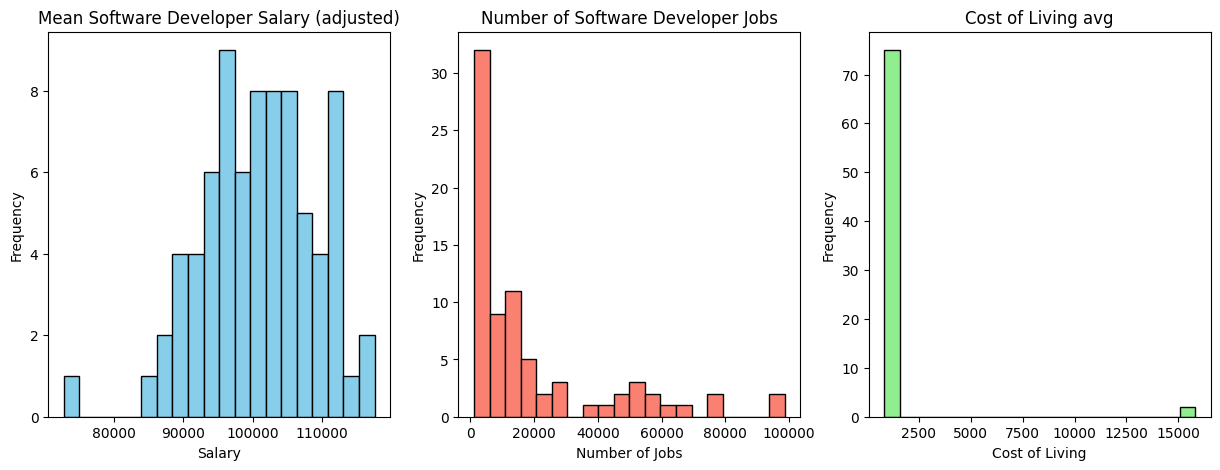

In [ ]:
## Checking for outliers in my dataset

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for Mean Software Developer Salary (adjusted)
axes[0].hist(myData['Mean Software Developer Salary (adjusted)'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Mean Software Developer Salary (adjusted)')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

# Histogram for Number of Software Developer Jobs
axes[1].hist(myData['Number of Software Developer Jobs'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Number of Software Developer Jobs')
axes[1].set_xlabel('Number of Jobs')
axes[1].set_ylabel('Frequency')

# Histogram for Cost of Living avg
axes[2].hist(myData['Cost of Living avg'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Cost of Living avg')
axes[2].set_xlabel('Cost of Living')
axes[2].set_ylabel('Frequency')

plt.show()


- These histograms show some outliers that I'd like to look at.

In [ ]:
# Figure out which rows contain these very large Cost of Living values
highCostOfLiving = myData[myData['Cost of Living avg'] > 2000]
print(highCostOfLiving['Cost of Living avg'])


32    15809.2
41    15809.2
Name: Cost of Living avg, dtype: float64


In [ ]:
# Take a look at the row overall
rowsToPrint = myData.loc[[32,41]]
rowsToPrint

,Metro,Mean Software Developer Salary (adjusted),Number of Software Developer Jobs,Cost of Living avg
32,"Los Angeles-Long Beach-Anaheim, CA",102188.0,53190,15809.2
41,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",99955.0,26370,15809.2


- It's unlikely that the Cost of Living avg for row 32 and row 41 would be the exact same.

- It's also unlikely that the cost of living average would have a difference this vast from the other entries.

- I'm going to assume that this is an input error and remove these rows from my analysis.

In [ ]:
myData = myData.drop([32,41])

In [ ]:
# Figure out which rows contain the high amount of software developer jobs
jobs = myData[myData['Number of Software Developer Jobs'] > 80000]
jobs

,Metro,Mean Software Developer Salary (adjusted),Number of Software Developer Jobs,Cost of Living avg
51,"New York-Newark-Jersey City, NY-NJ-PA",96686.0,98650,1412.9
52,"New York-Newark-Jersey City, NY-NJ-PA",96686.0,98650,1141.5


- This doesn't seem correct. We've also found what looks like a duplicate. Let's drop it.

In [ ]:
myData = myData.drop([51,52])

In [ ]:
# Figure out which rows contain the low mean salary (adjusted)
lowMeanSalary = myData[myData['Mean Software Developer Salary (adjusted)'] < 80000]
lowMeanSalary

,Metro,Mean Software Developer Salary (adjusted),Number of Software Developer Jobs,Cost of Living avg
76,"Urban Honolulu, HI",72811.0,1590,1464.5


- This one seems okay.

- Let's look at the summary statistics again

In [ ]:
myData.describe()

,Mean Software Developer Salary (adjusted),Number of Software Developer Jobs,Cost of Living avg
count,73.000000,73.000000,73.000000
mean,100940.054795,16352.465753,1023.419178
std,8253.503162,20013.048437,121.611227
min,72811.000000,1120.000000,832.500000
25%,95187.000000,2980.000000,956.700000
50%,101598.000000,8470.000000,993.000000
75%,107175.000000,20400.000000,1071.400000
max,117552.000000,78730.000000,1464.500000


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## **4. Data Exploration**

- now that our data set is cleaned up a bit, let's see what we can learn by exploring it more with some visualizations.

- Next, I'd like to see if there are any strong correlations between our columns. I will do this with a heatmap to get a good visualization of these correlations.

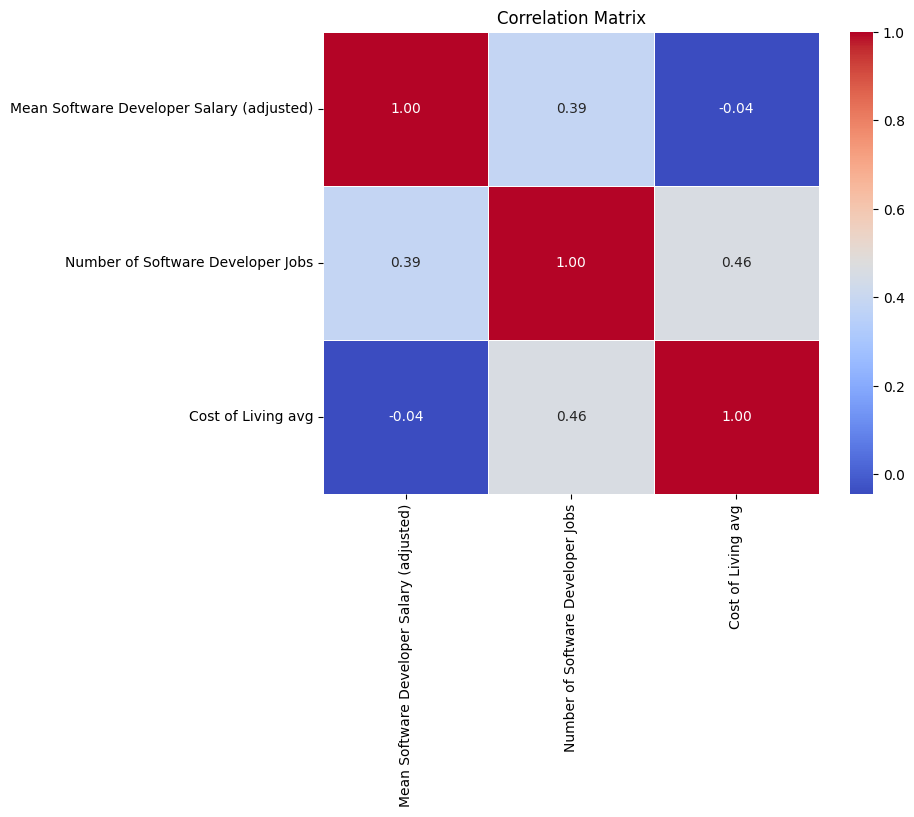

In [ ]:
# Select relevant columns for correlation analysis
selectedColumns = ['Mean Software Developer Salary (adjusted)', 'Number of Software Developer Jobs', 'Cost of Living avg']

# Create a subset of the data with selected columns
subsetData = myData[selectedColumns]

# Get the correlation matrix
correlationMatrix = subsetData.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

- The strongest correlation we have in the matrix is between the number of software developer jobs and the cost of living (0.46), which may suggest that areas with more software development jobs tend to have a higher cost of living.

- The 0.39 correlation between the mean software developer salary (adjusted) and the number of software developer jobs shows a moderate positive relationship.
  - This suggests that as the number of developer jobs in a metropolitan area increases, the mean adjusted salary for those jobs tends to increase as well.
  - Areas with more jobs might attract more developers, and may be driving up the average salary because of competition between the employers.
    - This could be really good for the developer, but it's a fairly moderate correlation. I don't know if I can put too much stock in it.

- Let's explore our data with a scatter plot now:

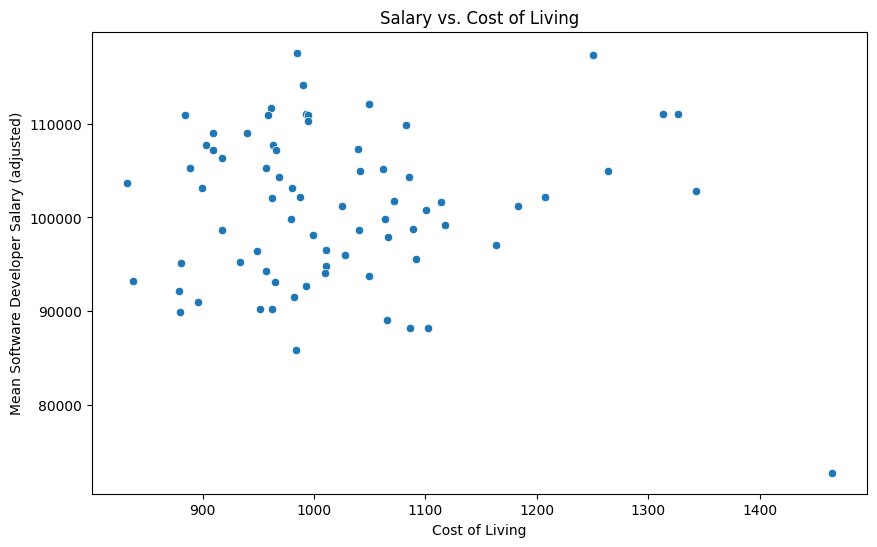

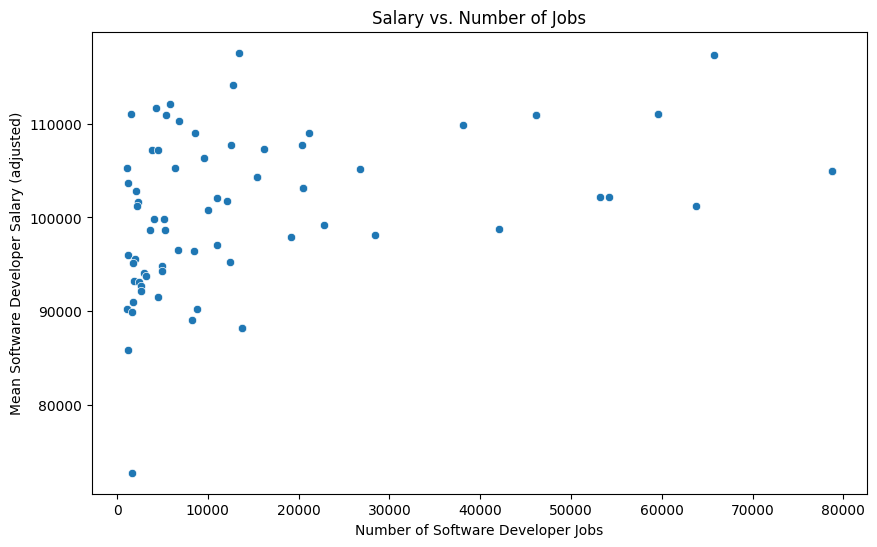

In [ ]:

# Scatter plot for salary vs. cost of living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living avg', y='Mean Software Developer Salary (adjusted)', data=myData)
plt.title('Salary vs. Cost of Living')
plt.xlabel('Cost of Living')
plt.ylabel('Mean Software Developer Salary (adjusted)')
plt.show()

# Scatter plot for salary vs. number of jobs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Software Developer Jobs', y='Mean Software Developer Salary (adjusted)', data=myData)
plt.title('Salary vs. Number of Jobs')
plt.xlabel('Number of Software Developer Jobs')
plt.ylabel('Mean Software Developer Salary (adjusted)')
plt.show()


- These scatter plots give us a good visual at how these variables interact with eachother.

## **Wrapping up**
- In the coming steps (Final Project) we will take what we've done and attempt to start answering our research question.
